In [2]:
from transformers.models.auto.tokenization_auto import AutoTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os
import re

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1=pd.read_csv('/kaggle/input/nlp-dataset/archive (1)/train_data.csv')
df1.head()

,sentence,sentiment
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [5]:
class_counts = df1['sentiment'].value_counts()

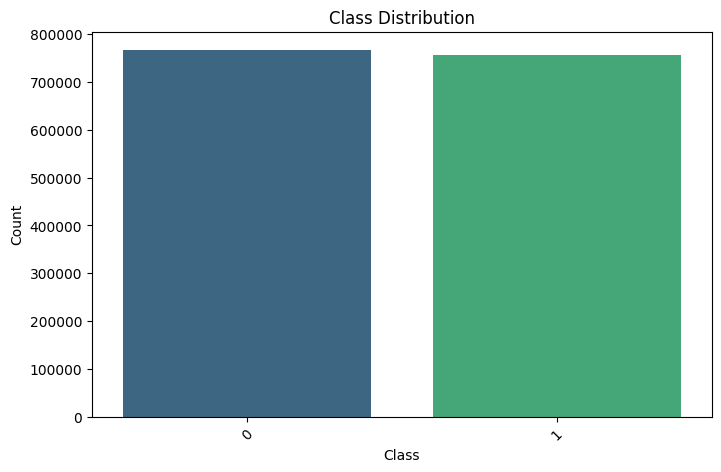

In [6]:
# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [7]:
class_counts

sentiment
0    767059
1    756916
Name: count, dtype: int64

In [8]:
pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# from sklearn.ensemble import RandomForestClassifier

#splitting the data

X=df1['sentence']
y=df1['sentiment']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#apply bert to convert text to vectors
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('bert-base-nli-mean-tokens')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
X_train

370187              i wanna play gta or sims but i can t fml
725013                        strawberries are my favoriiite
1122700                                  finally a good mood
618871     steph is a whorey untweeting twat gt lt she di...
904374                            w rk blasting in my office
                                 ...                        
259178     my hayfever is going to annoy me in my exam today
1414414    quot team j rn quot was singing on quot nordkj...
131932                                      why did you puke
671155     went to pool great time except when ball hit e...
121958     i have to work tomorrow how hope im okay cos t...
Name: sentence, Length: 1219180, dtype: object

In [12]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.utils import to_categorical

In [13]:
import nltk
import os

# Force re-download of WordNet and other required resources
nltk.download('wordnet', download_dir='/usr/share/nltk_data')
nltk.download('stopwords', download_dir='/usr/share/nltk_data')
nltk.download('omw-1.4', download_dir='/usr/share/nltk_data')

# Set the NLTK data path to the directory where the data is downloaded
nltk.data.path.append('/usr/share/nltk_data')

# Re-import stop words and lemmatizer to ensure they're properly initialized
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))




[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [16]:
def preprocess_text(text):
    # Check if text is a string
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user @ references and '#' from hashtags
    text = re.sub(r'\@\w+|\#','', text)
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Apply preprocessing
df1['clean_text'] = df1['sentence'].apply(preprocess_text)

# Display cleaned text
df1[['sentence', 'clean_text']].head()


,sentence,clean_text
0,awww that s a bummer you shoulda got david car...,awww that a bummer you shoulda got david carr ...
1,is upset that he can t update his facebook by ...,is upset that he can update his facebook by te...
2,i dived many times for the ball managed to sav...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,no it s not behaving at all i m mad why am i h...,no it not behaving at all m mad why am here be...


In [17]:
df1['sentiment'].value_counts()

sentiment
0    767059
1    756916
Name: count, dtype: int64

In [18]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np


In [19]:
# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df1['clean_text'].tolist(),
    df1['sentiment'].tolist(),
    test_size=0.2,
    random_state=42
)

In [20]:
# Define custom dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [21]:
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)  # Fully connected layer

    def forward(self, x):
        # LSTM output: (output, (hidden_state, cell_state))
        lstm_out, (hidden, _) = self.lstm(x)
        
        # hidden[-1] contains the last hidden state of the LSTM (shape: [batch_size, hidden_dim])
        # Pass it through the fully connected layer to get logits for each class
        return self.fc(hidden[-1])  # Output shape: [batch_size, num_classes]


In [22]:
class BiLSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_classes):
        super(BiLSTMClassifier, self).__init__()
        self.bilstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        _, (hidden, _) = self.bilstm(x)
        # Reshape hidden state correctly
        forward_hidden = hidden[-2]  # Forward hidden state from the last layer
        backward_hidden = hidden[-1]  # Backward hidden state from the last layer
        combined_hidden = torch.cat((forward_hidden, backward_hidden), dim=-1)  # Concatenate along feature dim
        return self.fc(combined_hidden)


In [23]:
class GRUClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_classes):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        _, hidden = self.gru(x)
        return self.fc(hidden[-1])

In [24]:
# Initialize tokenizer and BERT model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [25]:
# Prepare datasets and dataloaders
max_len = 128
batch_size = 64

train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_len)
val_dataset = SentimentDataset(val_texts, val_labels, tokenizer, max_len)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)


In [26]:
# Extract BERT embeddings
def extract_embeddings(dataloader):
    bert_model.eval()
    embeddings, labels = [], []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            label = batch['label'].to(device)

            outputs = bert_model(input_ids, attention_mask=attention_mask)
            embeddings.append(outputs.last_hidden_state[:, 0, :].cpu().numpy())
            labels.append(label.cpu().numpy())

    return np.vstack(embeddings), np.hstack(labels)

In [27]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

train_embeddings, train_labels = extract_embeddings(train_dataloader)
val_embeddings, val_labels = extract_embeddings(val_dataloader)

# Initialize base classifiers
embedding_dim = train_embeddings.shape[1]
hidden_dim = 128
num_classes = len(set(train_labels))

lstm_model = LSTMClassifier(embedding_dim, hidden_dim, num_classes).to(device)
bilstm_model = BiLSTMClassifier(embedding_dim, hidden_dim, num_classes).to(device)
gru_model = GRUClassifier(embedding_dim, hidden_dim, num_classes).to(device)

In [28]:
def train_model(model, train_embeddings, train_labels, val_embeddings, val_labels, epochs=10, batch_size=64):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for i in range(0, len(train_embeddings), batch_size):
            inputs = train_embeddings[i:i + batch_size]
            labels = train_labels[i:i + batch_size]

            # Reshape inputs to add sequence dimension
            inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(1).to(device)  # Shape: [batch_size, 1, embedding_dim]
            labels = torch.tensor(labels, dtype=torch.long).to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for i in range(0, len(val_embeddings), batch_size):
                val_inputs = val_embeddings[i:i + batch_size]
                val_labels_batch = val_labels[i:i + batch_size]

                # Reshape inputs to add sequence dimension
                val_inputs = torch.tensor(val_inputs, dtype=torch.float32).unsqueeze(1).to(device)  # Shape: [batch_size, 1, embedding_dim]
                val_labels_batch = torch.tensor(val_labels_batch, dtype=torch.long).to(device)

                val_outputs = model(val_inputs)
                val_loss += criterion(val_outputs, val_labels_batch).item()

        print(f"Epoch {epoch + 1}: Training loss: {train_loss / len(train_embeddings):.4f}, "
              f"Validation loss: {val_loss / len(val_embeddings):.4f}")


In [29]:
# Train base classifiers
train_model(lstm_model, train_embeddings, train_labels, val_embeddings, val_labels)
train_model(bilstm_model, train_embeddings, train_labels, val_embeddings, val_labels)
train_model(gru_model, train_embeddings, train_labels, val_embeddings, val_labels)

Epoch 1: Training loss: 0.0073, Validation loss: 0.0071
Epoch 2: Training loss: 0.0070, Validation loss: 0.0070
Epoch 3: Training loss: 0.0069, Validation loss: 0.0070
Epoch 4: Training loss: 0.0068, Validation loss: 0.0070
Epoch 5: Training loss: 0.0068, Validation loss: 0.0070
Epoch 6: Training loss: 0.0067, Validation loss: 0.0070
Epoch 7: Training loss: 0.0067, Validation loss: 0.0070
Epoch 8: Training loss: 0.0066, Validation loss: 0.0070
Epoch 9: Training loss: 0.0066, Validation loss: 0.0071
Epoch 10: Training loss: 0.0065, Validation loss: 0.0071
Epoch 1: Training loss: 0.0073, Validation loss: 0.0071
Epoch 2: Training loss: 0.0070, Validation loss: 0.0070
Epoch 3: Training loss: 0.0069, Validation loss: 0.0070
Epoch 4: Training loss: 0.0068, Validation loss: 0.0070
Epoch 5: Training loss: 0.0068, Validation loss: 0.0070
Epoch 6: Training loss: 0.0067, Validation loss: 0.0070
Epoch 7: Training loss: 0.0066, Validation loss: 0.0070
Epoch 8: Training loss: 0.0066, Validation loss

In [30]:
with torch.no_grad():
    # Reshape embeddings to [batch_size, seq_len, embedding_dim] for LSTM, BiLSTM, and GRU
    train_embeddings_reshaped = torch.tensor(train_embeddings, dtype=torch.float32).unsqueeze(1).to(device)
    val_embeddings_reshaped = torch.tensor(val_embeddings, dtype=torch.float32).unsqueeze(1).to(device)

    # Get model predictions for train set
    lstm_output = lstm_model(train_embeddings_reshaped)
    print(f"LSTM output shape for train set: {lstm_output.shape}")
    train_preds = np.hstack([torch.softmax(lstm_output, dim=1).cpu().numpy()])

    # BiLSTM and GRU predictions
    bilstm_output = bilstm_model(train_embeddings_reshaped)
    print(f"BiLSTM output shape for train set: {bilstm_output.shape}")
    
    gru_output = gru_model(train_embeddings_reshaped)
    print(f"GRU output shape for train set: {gru_output.shape}")
    
    # Apply softmax and stack predictions
    train_preds = np.hstack([
        train_preds, 
        torch.softmax(bilstm_output, dim=1).cpu().numpy(),
        torch.softmax(gru_output, dim=1).cpu().numpy()
    ])
    
    # Get model predictions for validation set
    lstm_output_val = lstm_model(val_embeddings_reshaped)
    print(f"LSTM output shape for validation set: {lstm_output_val.shape}")
    val_preds = np.hstack([torch.softmax(lstm_output_val, dim=1).cpu().numpy()])
    
    # BiLSTM and GRU predictions for validation
    bilstm_output_val = bilstm_model(val_embeddings_reshaped)
    print(f"BiLSTM output shape for validation set: {bilstm_output_val.shape}")
    
    gru_output_val = gru_model(val_embeddings_reshaped)
    print(f"GRU output shape for validation set: {gru_output_val.shape}")
    
    # Apply softmax and stack validation predictions
    val_preds = np.hstack([
        val_preds, 
        torch.softmax(bilstm_output_val, dim=1).cpu().numpy(),
        torch.softmax(gru_output_val, dim=1).cpu().numpy()
    ])

    print("Train Predictions Shape:", train_preds.shape)
    print("Validation Predictions Shape:", val_preds.shape)


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.37 GiB. GPU 0 has a total capacity of 15.89 GiB of which 7.39 GiB is free. Process 3364 has 8.49 GiB memory in use. Of the allocated memory 8.12 GiB is allocated by PyTorch, and 78.31 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
svm = SVC(probability=True)
svm.fit(train_preds, train_labels)

val_svm_preds = svm.predict(val_preds)
accuracy = accuracy_score(val_labels, val_svm_preds)
print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already made predictions using your model:
# 'val_svm_preds' are the predicted labels from your stacking ensemble (SVM) model
# 'val_labels' are the true labels from the validation set

# Define true labels and predictions
true_labels = val_labels  # True labels from validation set
predictions = val_svm_preds  # Predictions from SVM model

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [6]:
df2=pd.read_csv('/kaggle/input/nlp-dataset/archive (2)/Tweets.csv')
df2.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
df2.shape

(14640, 15)

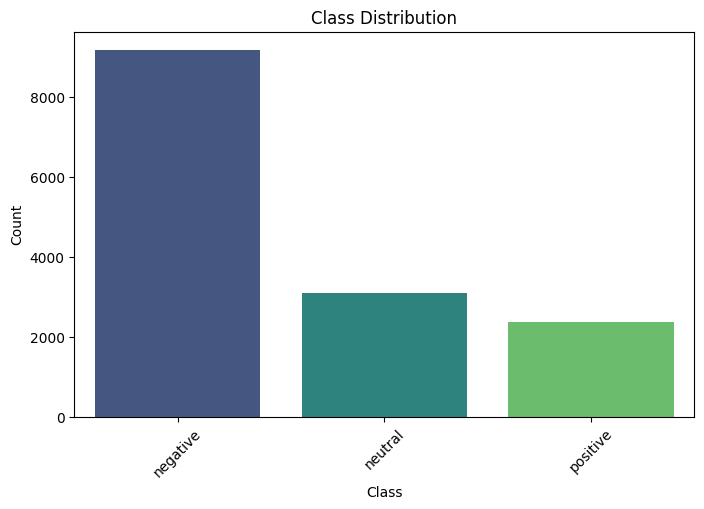

In [8]:
class_counts = df2['airline_sentiment'].value_counts()
# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
class_counts

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [10]:
import pandas as pd
from sklearn.utils import resample

# Example DataFrame
# data = {
#     'text': ['text'] * 14640,  # Replace with actual text data
#     'sentiment': ['negative'] * 9178 + ['neutral'] * 3099 + ['positive'] * 2363
# }
# df = pd.DataFrame(data)

# Separate by sentiment
negative = df2[df2['airline_sentiment'] == 'negative']
neutral = df2[df2['airline_sentiment'] == 'neutral']
positive = df2[df2['airline_sentiment'] == 'positive']

# Determine the size of the minority class
minority_class_size = min(len(negative), len(neutral), len(positive))

# Under-sample the majority classes
negative_undersampled = resample(negative, replace=False, n_samples=minority_class_size, random_state=42)
neutral_undersampled = resample(neutral, replace=False, n_samples=minority_class_size, random_state=42)
positive_undersampled = resample(positive, replace=False, n_samples=minority_class_size, random_state=42)

# Combine the under-sampled data
balanced_df = pd.concat([negative_undersampled, neutral_undersampled, positive_undersampled])

# Shuffle the data
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the class distribution
print(balanced_df['airline_sentiment'].value_counts())


airline_sentiment
neutral     2363
positive    2363
negative    2363
Name: count, dtype: int64


In [11]:
balanced_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569890211301191680,neutral,1.0000,NaN,NaN,Southwest,NaN,AlMehairiAUH,NaN,0,@SouthwestAir to start daily #B737-700 flights...,NaN,2015-02-23 08:03:09 -0800,Abu Dhabi,Abu Dhabi
1,569644310045417472,positive,1.0000,NaN,NaN,Southwest,NaN,SamuelLSchultz,NaN,0,@SouthwestAir has a beautiful fleet. What a pe...,NaN,2015-02-22 15:46:01 -0800,"Houston, TX",Central Time (US & Canada)
2,569238450794209280,negative,1.0000,Flight Booking Problems,0.6317,US Airways,NaN,KaiserRolls,NaN,0,@USAirways -beg to differ. 4 things booked wro...,NaN,2015-02-21 12:53:17 -0800,Arizona,Arizona
3,567807640660619267,neutral,0.6457,NaN,NaN,Virgin America,NaN,ICEportal,NaN,0,@VirginAmerica Good point!,NaN,2015-02-17 14:07:45 -0800,"Hollywood, FL",Eastern Time (US & Canada)
4,567718292530688000,neutral,1.0000,NaN,NaN,Delta,NaN,Karimilrodz,NaN,0,@JetBlue I hear that the new thing in your pla...,NaN,2015-02-17 08:12:43 -0800,Puerto Rico,NaN


In [12]:
# pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.4 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# from sklearn.ensemble import RandomForestClassifier

#splitting the data

X=balanced_df['text']
y=balanced_df['airline_sentiment']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#apply bert to convert text to vectors
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('bert-base-nli-mean-tokens')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
X_train

5121       @SouthwestAir is having a sale! I'm delighted!
3418               @united how's my refund coming along??
2226    @AmericanAir cost me over 200 dollars because ...
6280    @JetBlue totally would have.... but the outsid...
530                @SouthwestAir please reply to my DM ♥️
                              ...                        
3772    @AmericanAir at 5 am and have no clue if we ha...
5191    @United Is Changing Its #MileagePlus Program: ...
5226                      @united you're good. Thank you!
5390    @SouthwestAir, you're really going to let @del...
860     @SouthwestAir @SouthwestOliver that's a great ...
Name: text, Length: 5671, dtype: object

In [15]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.utils import to_categorical

In [16]:
import nltk
import os

# Force re-download of WordNet and other required resources
nltk.download('wordnet', download_dir='/usr/share/nltk_data')
nltk.download('stopwords', download_dir='/usr/share/nltk_data')
nltk.download('omw-1.4', download_dir='/usr/share/nltk_data')

# Set the NLTK data path to the directory where the data is downloaded
nltk.data.path.append('/usr/share/nltk_data')

# Re-import stop words and lemmatizer to ensure they're properly initialized
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))




[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [17]:
def preprocess_text(text):
    # Check if text is a string
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user @ references and '#' from hashtags
    text = re.sub(r'\@\w+|\#','', text)
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Apply preprocessing
balanced_df['clean_text'] = balanced_df['text'].apply(preprocess_text)

# Display cleaned text
balanced_df[['text', 'clean_text']].head()


,text,clean_text
0,@SouthwestAir to start daily #B737-700 flights...,to start daily flights from columbus oh to oak...
1,@SouthwestAir has a beautiful fleet. What a pe...,has beautiful fleet what perfect evening to fly
2,@USAirways -beg to differ. 4 things booked wro...,beg to differ things booked wrong and still no...
3,@VirginAmerica Good point!,good point
4,@JetBlue I hear that the new thing in your pla...,hear that the new thing in your planes are the...


In [18]:
label_encoder = LabelEncoder()
balanced_df['sentiment_encoded'] = label_encoder.fit_transform(balanced_df['airline_sentiment'])

In [19]:
balanced_df['sentiment_encoded'].value_counts()

sentiment_encoded
1    2363
2    2363
0    2363
Name: count, dtype: int64

In [20]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np


In [21]:
# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    balanced_df['clean_text'].tolist(),
    balanced_df['sentiment_encoded'].tolist(),
    test_size=0.2,
    random_state=42
)

In [22]:
# Define custom dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [23]:
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)  # Fully connected layer

    def forward(self, x):
        # LSTM output: (output, (hidden_state, cell_state))
        lstm_out, (hidden, _) = self.lstm(x)
        
        # hidden[-1] contains the last hidden state of the LSTM (shape: [batch_size, hidden_dim])
        # Pass it through the fully connected layer to get logits for each class
        return self.fc(hidden[-1])  # Output shape: [batch_size, num_classes]


In [36]:
# # Example BiLSTM model definition
# class BiLSTMModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(BiLSTMModel, self).__init__()
#         self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
#         self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

#     def forward(self, x):
#         _, (hn, _) = self.lstm(x)
#         out = self.fc(hn[-1])  # Use the last hidden state
#         return out

In [46]:
class BiLSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_classes):
        super(BiLSTMClassifier, self).__init__()
        self.bilstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        _, (hidden, _) = self.bilstm(x)
        # Reshape hidden state correctly
        forward_hidden = hidden[-2]  # Forward hidden state from the last layer
        backward_hidden = hidden[-1]  # Backward hidden state from the last layer
        combined_hidden = torch.cat((forward_hidden, backward_hidden), dim=-1)  # Concatenate along feature dim
        return self.fc(combined_hidden)


In [29]:
# train_embeddings = train_embeddings[:, None, :]  # Add sequence dimension
# val_embeddings = val_embeddings[:, None, :]


In [47]:
class GRUClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_classes):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        _, hidden = self.gru(x)
        return self.fc(hidden[-1])

In [48]:
# Initialize tokenizer and BERT model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)

In [49]:
# Prepare datasets and dataloaders
max_len = 128
batch_size = 64

train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_len)
val_dataset = SentimentDataset(val_texts, val_labels, tokenizer, max_len)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)


In [50]:
# Extract BERT embeddings
def extract_embeddings(dataloader):
    bert_model.eval()
    embeddings, labels = [], []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            label = batch['label'].to(device)

            outputs = bert_model(input_ids, attention_mask=attention_mask)
            embeddings.append(outputs.last_hidden_state[:, 0, :].cpu().numpy())
            labels.append(label.cpu().numpy())

    return np.vstack(embeddings), np.hstack(labels)

In [51]:
len(set(train_labels))

3

In [52]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

train_embeddings, train_labels = extract_embeddings(train_dataloader)
val_embeddings, val_labels = extract_embeddings(val_dataloader)

# Initialize base classifiers
embedding_dim = train_embeddings.shape[1]
hidden_dim = 128
num_classes = len(set(train_labels))

lstm_model = LSTMClassifier(embedding_dim, hidden_dim, num_classes).to(device)
bilstm_model = BiLSTMClassifier(embedding_dim, hidden_dim, num_classes).to(device)
gru_model = GRUClassifier(embedding_dim, hidden_dim, num_classes).to(device)

In [53]:
def train_model(model, train_embeddings, train_labels, val_embeddings, val_labels, epochs=10, batch_size=64):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for i in range(0, len(train_embeddings), batch_size):
            inputs = train_embeddings[i:i + batch_size]
            labels = train_labels[i:i + batch_size]

            # Reshape inputs to add sequence dimension
            inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(1).to(device)  # Shape: [batch_size, 1, embedding_dim]
            labels = torch.tensor(labels, dtype=torch.long).to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for i in range(0, len(val_embeddings), batch_size):
                val_inputs = val_embeddings[i:i + batch_size]
                val_labels_batch = val_labels[i:i + batch_size]

                # Reshape inputs to add sequence dimension
                val_inputs = torch.tensor(val_inputs, dtype=torch.float32).unsqueeze(1).to(device)  # Shape: [batch_size, 1, embedding_dim]
                val_labels_batch = torch.tensor(val_labels_batch, dtype=torch.long).to(device)

                val_outputs = model(val_inputs)
                val_loss += criterion(val_outputs, val_labels_batch).item()

        print(f"Epoch {epoch + 1}: Training loss: {train_loss / len(train_embeddings):.4f}, "
              f"Validation loss: {val_loss / len(val_embeddings):.4f}")


In [54]:
# Train base classifiers
train_model(lstm_model, train_embeddings, train_labels, val_embeddings, val_labels)
train_model(bilstm_model, train_embeddings, train_labels, val_embeddings, val_labels)
train_model(gru_model, train_embeddings, train_labels, val_embeddings, val_labels)

Epoch 1: Training loss: 0.0173, Validation loss: 0.0178
Epoch 2: Training loss: 0.0172, Validation loss: 0.0178
Epoch 3: Training loss: 0.0172, Validation loss: 0.0179
Epoch 4: Training loss: 0.0171, Validation loss: 0.0182
Epoch 5: Training loss: 0.0169, Validation loss: 0.0184
Epoch 6: Training loss: 0.0167, Validation loss: 0.0186
Epoch 7: Training loss: 0.0164, Validation loss: 0.0188
Epoch 8: Training loss: 0.0161, Validation loss: 0.0191
Epoch 9: Training loss: 0.0157, Validation loss: 0.0195
Epoch 10: Training loss: 0.0153, Validation loss: 0.0197
Epoch 1: Training loss: 0.0173, Validation loss: 0.0178
Epoch 2: Training loss: 0.0172, Validation loss: 0.0178
Epoch 3: Training loss: 0.0172, Validation loss: 0.0180
Epoch 4: Training loss: 0.0170, Validation loss: 0.0183
Epoch 5: Training loss: 0.0169, Validation loss: 0.0185
Epoch 6: Training loss: 0.0166, Validation loss: 0.0190
Epoch 7: Training loss: 0.0163, Validation loss: 0.0191
Epoch 8: Training loss: 0.0159, Validation loss

In [55]:
with torch.no_grad():
    # Reshape embeddings to [batch_size, seq_len, embedding_dim] for LSTM, BiLSTM, and GRU
    train_embeddings_reshaped = torch.tensor(train_embeddings, dtype=torch.float32).unsqueeze(1).to(device)
    val_embeddings_reshaped = torch.tensor(val_embeddings, dtype=torch.float32).unsqueeze(1).to(device)

    # Get model predictions for train set
    lstm_output = lstm_model(train_embeddings_reshaped)
    print(f"LSTM output shape for train set: {lstm_output.shape}")
    train_preds = np.hstack([torch.softmax(lstm_output, dim=1).cpu().numpy()])

    # BiLSTM and GRU predictions
    bilstm_output = bilstm_model(train_embeddings_reshaped)
    print(f"BiLSTM output shape for train set: {bilstm_output.shape}")
    
    gru_output = gru_model(train_embeddings_reshaped)
    print(f"GRU output shape for train set: {gru_output.shape}")
    
    # Apply softmax and stack predictions
    train_preds = np.hstack([
        train_preds, 
        torch.softmax(bilstm_output, dim=1).cpu().numpy(),
        torch.softmax(gru_output, dim=1).cpu().numpy()
    ])
    
    # Get model predictions for validation set
    lstm_output_val = lstm_model(val_embeddings_reshaped)
    print(f"LSTM output shape for validation set: {lstm_output_val.shape}")
    val_preds = np.hstack([torch.softmax(lstm_output_val, dim=1).cpu().numpy()])
    
    # BiLSTM and GRU predictions for validation
    bilstm_output_val = bilstm_model(val_embeddings_reshaped)
    print(f"BiLSTM output shape for validation set: {bilstm_output_val.shape}")
    
    gru_output_val = gru_model(val_embeddings_reshaped)
    print(f"GRU output shape for validation set: {gru_output_val.shape}")
    
    # Apply softmax and stack validation predictions
    val_preds = np.hstack([
        val_preds, 
        torch.softmax(bilstm_output_val, dim=1).cpu().numpy(),
        torch.softmax(gru_output_val, dim=1).cpu().numpy()
    ])

    print("Train Predictions Shape:", train_preds.shape)
    print("Validation Predictions Shape:", val_preds.shape)


LSTM output shape for train set: torch.Size([5671, 3])
BiLSTM output shape for train set: torch.Size([5671, 3])
GRU output shape for train set: torch.Size([5671, 3])
LSTM output shape for validation set: torch.Size([1418, 3])
BiLSTM output shape for validation set: torch.Size([1418, 3])
GRU output shape for validation set: torch.Size([1418, 3])
Train Predictions Shape: (5671, 9)
Validation Predictions Shape: (1418, 9)


In [56]:
svm = SVC(probability=True)
svm.fit(train_preds, train_labels)

val_svm_preds = svm.predict(val_preds)
accuracy = accuracy_score(val_labels, val_svm_preds)
print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")


Stacking Ensemble Accuracy: 0.3470


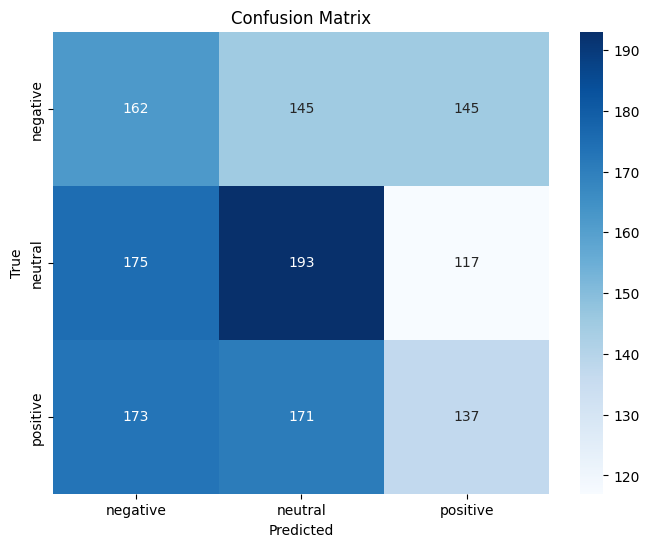

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already made predictions using your model:
# 'val_svm_preds' are the predicted labels from your stacking ensemble (SVM) model
# 'val_labels' are the true labels from the validation set

# Define true labels and predictions
true_labels = val_labels  # True labels from validation set
predictions = val_svm_preds  # Predictions from SVM model

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [94]:
# Stacking ensemble with SVM
lstm_model.eval()
bilstm_model.eval()
gru_model.eval()

with torch.no_grad():
    train_preds = np.hstack([
        torch.softmax(lstm_model(torch.tensor(train_embeddings, dtype=torch.float32).to(device)), dim=1).cpu().numpy(),
        torch.softmax(bilstm_model(torch.tensor(train_embeddings, dtype=torch.float32).to(device)), dim=1).cpu().numpy(),
        torch.softmax(gru_model(torch.tensor(train_embeddings, dtype=torch.float32).to(device)), dim=1).cpu().numpy()
    ])

    val_preds = np.hstack([
        torch.softmax(lstm_model(torch.tensor(val_embeddings, dtype=torch.float32).to(device)), dim=1).cpu().numpy(),
        torch.softmax(bilstm_model(torch.tensor(val_embeddings, dtype=torch.float32).to(device)), dim=1).cpu().numpy(),
        torch.softmax(gru_model(torch.tensor(val_embeddings, dtype=torch.float32).to(device)), dim=1).cpu().numpy()
    ])

train_preds = train_preds.reshape(len(train_embeddings), -1)
val_preds = val_preds.reshape(len(val_embeddings), -1)


svm = SVC(probability=True)
svm.fit(train_preds, train_labels)

val_svm_preds = svm.predict(val_preds)
accuracy = accuracy_score(val_labels, val_svm_preds)
print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")



IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [41]:
# Initialize tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Check for GPU and move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Prepare datasets and dataloaders
max_len = 128
batch_size = 64

train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_len)
val_dataset = SentimentDataset(val_texts, val_labels, tokenizer, max_len)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_training_steps = len(train_dataloader) * 3  # 3 epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [43]:
# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

    avg_train_loss = train_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}: Training loss: {avg_train_loss:.4f}")

    # Validation loop
    model.eval()
    val_loss = 0
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()

            logits = outputs.logits
            predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_dataloader)
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Validation loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}")

KeyboardInterrupt: 